#First install the BASICO package.  Since it is not yet on the "pypi" repository, we need to install it from its github repository.

In [ ]:
!pip install git+https://github.com/copasi/basico.git
from basico import *


  Cloning https://github.com/copasi/basico.git to /tmp/pip-req-build-dkxcsak0
  Running command git clone -q https://github.com/copasi/basico.git /tmp/pip-req-build-dkxcsak0
  Created wheel for basico: filename=basico-0+untagged.146.gbe7dbbf-cp37-none-any.whl size=108963 sha256=2b537fa51f06ea359d1d0c0868aa178fb7c5b125881b0f709d7689922aa65008
  Stored in directory: /tmp/pip-ephem-wheel-cache-6vczg1v5/wheels/4a/fc/7a/81a1374aa02c9dc16a4a20cf3613dc11982bff9c8ffb6f3b4e
Successfully built basico


In [ ]:
import basico.biomodels as biomodels

In [ ]:
predator_models = biomodels.search_for_model('Predator')
for model in predator_models: # for each model that mathes "Predator", print out the model id and name
    print ('Id: %s' % model['id'])
    print ('Name: %s' % model['name'])

Id: BIOMD0000000296
Name: Balagaddé2008_E_coli_Predator_Prey
Id: BIOMD0000000758
Name: Babbs2012 - immunotherapy


In [ ]:
info = biomodels.get_model_info(296)
print (info['name'])
print (info['description'])
# get the model itself
load_biomodel(296) #COPASI can only load one model at a time

Balagaddé2008_E_coli_Predator_Prey
<notes xmlns="http://www.sbml.org/sbml/level2/version4">
      <body xmlns="http://www.w3.org/1999/xhtml">
        <p>This is the reduced model described in the article:<br />
        <b>A synthetic Escherichia coli predator–prey ecosystem</b>
        <br />
Balagaddé FK, Song H, Ozaki J, Collins CH, Barnet M, Arnold FH, Quake SR, You L.<em>Mol Syst Biol.</em> 2008;4:187. Epub 2008 Apr 15. PMID: <a href="http://www.ncbi.nlm.nih.gov/pubmed/18414488">18414488</a>; DOI:<a href="http://dx.doi.org/10.1038/msb.2008.24">10.1038/msb.2008.24</a>
      </p>
      <p>
Abstract:<br />
We have constructed a synthetic ecosystem consisting of two Escherichia coli populations, which communicate bi-directionally through quorum sensing and regulate each other's gene expression and survival via engineered gene circuits. Our synthetic ecosystem resembles canonical predator–prey systems in terms of logic and dynamics. The predator cells kill the prey by inducing expressio

<CDataModel "Root">

#Only one model is loaded at a time, so subsequent. commands refer to. that model (the one we just loaded)

In [ ]:
allspecies = get_species() # you can see that you don't need to pass in the model again
print(allspecies)
allreactions = get_reactions()
print(allreactions)
allparams = get_reaction_parameters()
print(allparams)

        compartment       type  ... particle_number_rate           key
name                            ...                                   
C1      environment  reactions  ...                  0.0  Metabolite_1
C2      environment  reactions  ...                  0.0  Metabolite_2
A1      environment  reactions  ...                  0.0  Metabolite_3
A2      environment  reactions  ...                  0.0  Metabolite_4
IPTG    environment      fixed  ...                  0.0  Metabolite_0
sink    environment      fixed  ...                  0.0  Metabolite_5
source  environment      fixed  ...                  0.0  Metabolite_6

[7 rows x 12 columns]
                               scheme  ...                         function
name                                   ...                                 
predator growth     source -> C1;  C2  ...     Function for predator growth
predator death        C1 -> sink;  A2  ...      Function for predator death
prey growth         source -> C2; 

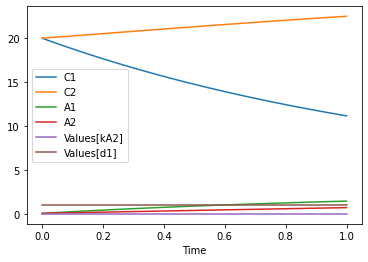

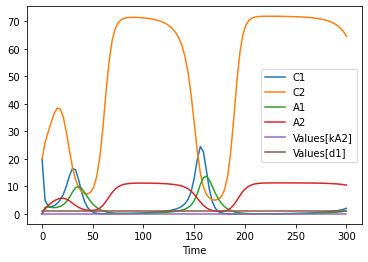

In [ ]:
result = run_time_course() #default is one second
result.plot();

result = run_time_course(duration=300)
result.plot();

# what is this call to "run_time_course" equivalent to that we have used previously?

AxesSubplot(0.125,0.125;0.775x0.755)


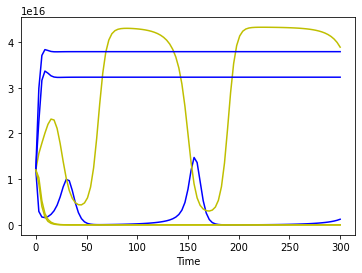

In [ ]:
fig, ax = plt.subplots()
print(ax)
for gr in [0.8, 2.4, 3]:
    set_reaction_parameters('(predator growth).kc1', value=gr)
    result = run_time_course(duration=300, method='deterministic', use_numbers=True)
    result.plot(y='C1', color='b', ax=ax, legend=None);
    result.plot(y='C2', color='y', ax=ax, legend=None);
    #the package also includes

#The package also includes "set_species" and "set_reaction"

#Now search for a set of models, display their names and run them!

Id: BIOMD0000000257
Name: Piedrafita2010_MR_System


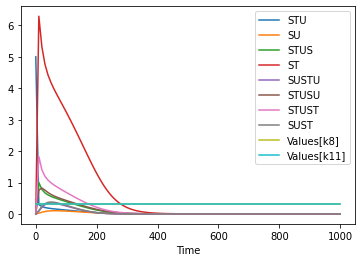

Id: BIOMD0000000755
Name: Hansen2019 - Nine species reduced model of blood coagulation


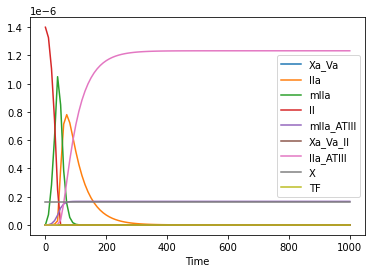

Id: MODEL1006230040
Name: Yang2006_Methadone_PKmodel


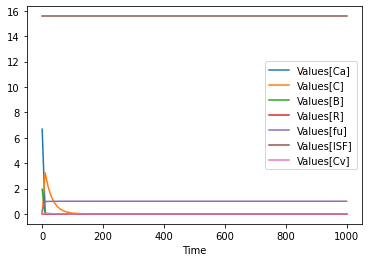

Id: MODEL1109130000
Name: Thiele2013 - Human metabolism global reconstruction (Recon 2)


In [ ]:
michaelis_models = biomodels.search_for_model('opioid')
for model in michaelis_models:
    print ('Id: %s' % model['id'])
    print ('Name: %s' % model['name'])
    load_biomodel(model['id'])
    result = run_time_course(duration=1000)
    result.plot();
    plt.show(block=False)